In [258]:
from keras.datasets import cifar10
import pandas as pd


In [259]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape
y_test1=y_test

In [260]:
X_test.shape

(10000, 32, 32, 3)

In [261]:
X_train[2]

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]

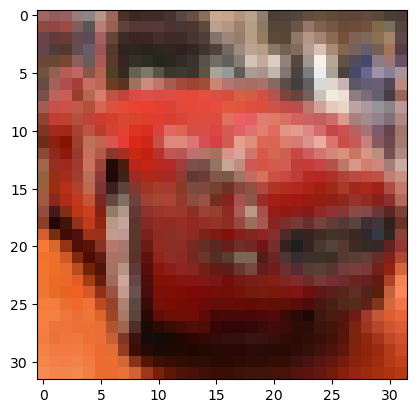

In [262]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [263]:
import numpy as np
labels_unique=np.unique(y_train)
print(labels_unique)

[0 1 2 3 4 5 6 7 8 9]


In [264]:
label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
print(label[2])

bird


In [265]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

<h2>One hot encoding</h2>

In [266]:
from keras.utils import to_categorical#one hot encoding of labels
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)


<h2>Normalization</h2>

In [267]:
X_train = X_train.astype('float32')# Convert to float32
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0 
X_test /= 255.0
X_valid /= 255.0


<h2>CNN model</h2>

In [268]:
from keras.models import Sequential                          #cnn model
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten,BatchNormalization


model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
  

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30)) 

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(32,activation='relu')) 
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

model.add(Dense(64, activation='relu'))  
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

model.add(Dense(10, activation='softmax'))


c:\Users\megha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [269]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,858 (636.16 KB)

 Trainable params: 162,218 (633.66 KB)

 Non-trainable params: 640 (2.50 KB)

In [270]:

from keras.optimizers import Adam


optimizer = Adam()
model.compile(optimizer= optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 90ms/step - accuracy: 0.2365 - loss: 2.3868 - val_accuracy: 0.3484 - val_loss: 1.7361
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.4128 - loss: 1.5721 - val_accuracy: 0.4774 - val_loss: 1.3773
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.5059 - loss: 1.3676 - val_accuracy: 0.5926 - val_loss: 1.1356
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5559 - loss: 1.2426 - val_accuracy: 0.6186 - val_loss: 1.0583
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6069 - loss: 1.1458 - val_accuracy: 0.6251 - val_loss: 1.0505
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.6283 - loss: 1.0697 - val_accuracy: 0.6871 - val_loss: 0.8985
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6542 - loss: 1.0065 - val_accuracy: 0.6939 - val_loss: 0.8746
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6739 - loss: 0.9541 - 

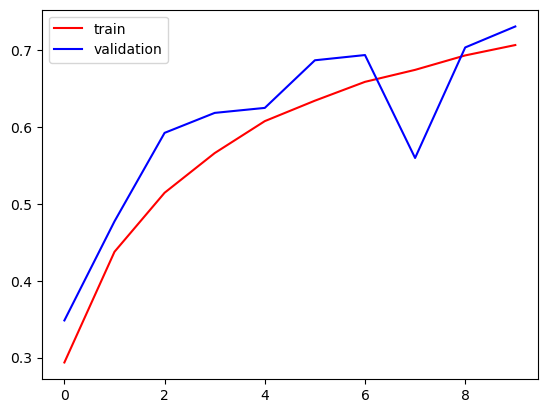

In [271]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


#epochs versus accuracy


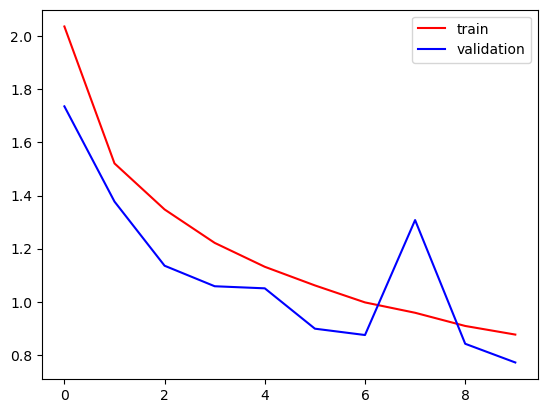

In [272]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#epochs versus loss

<h2>Model Evaluation on Test data</h2>

In [368]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)
y_pred = model.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7310 - loss: 0.7782

Test Accuracy: 0.7242000102996826
Test Loss:     0.7895413041114807
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
[[3.26051861e-02 9.23931226e-03 5.19909449e-02 ... 2.02707965e-02
  1.77569181e-01 6.03907369e-02]
 [1.15235085e-02 8.41110572e-03 3.43107153e-04 ... 2.41225825e-05
  9.77947295e-01 1.23902364e-03]
 [4.46805060e-02 2.55922396e-02 2.12337659e-03 ... 4.79138602e-04
  8.94351065e-01 2.61901747e-02]
 ...
 [5.37086977e-04 1.56633818e-04 2.33298726e-02 ... 3.37675326e-02
  2.29491692e-04 2.97536259e-04]
 [2.52493382e-01 2.69023925e-01 8.77430066e-02 ... 8.62410292e-02
  5.02006263e-02 1.81179009e-02]
 [2.09465827e-04 7.40195319e-05 1.04581099e-03 ... 9.67012048e-01
  1.06589396e-05 1.60852898e-04]]


In [369]:
predictions= model.predict(X_test)
pred = predictions.argmax(axis=1)
print(pred)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
[3 8 8 ... 5 1 7]


In [370]:
ytest1= y_test1.reshape(-1)

In [371]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1000
           1       0.91      0.80      0.85      1000
           2       0.64      0.58      0.61      1000
           3       0.58      0.47      0.52      1000
           4       0.60      0.75      0.66      1000
           5       0.64      0.56      0.60      1000
           6       0.82      0.74      0.78      1000
           7       0.73      0.83      0.78      1000
           8       0.81      0.87      0.84      1000
           9       0.76      0.86      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



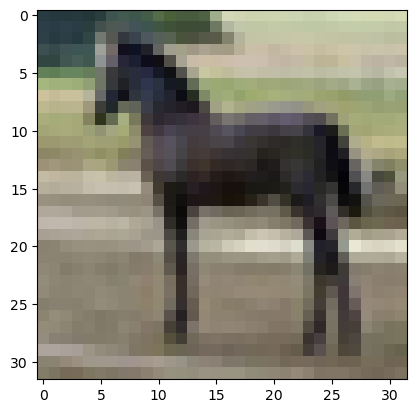

In [372]:
m=6780
plt.imshow(X_test[m])

In [373]:
image = X_test[m].reshape((1, 32, 32, 3))

In [374]:
predictions=model.predict(image)
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[3.4737612e-05, 2.8666789e-06, 1.4159184e-04, 1.3252170e-04,
        1.3743277e-03, 1.2140349e-03, 3.7664247e-06, 9.9706441e-01,
        3.0773529e-07, 3.1491349e-05]], dtype=float32)

In [375]:
predicted_class = predictions.argmax()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [376]:
print('Predicted class: ', class_names[predicted_class])

Predicted class:  horse
